# KR1 and KR2: Physics equation - The Gamma function
According to the NIST Digital Library of Mathematical Functions (DLMF), the Gamma function, or Euler's integral is given by

$$\Gamma (z) = \int_0^\infty e^{-t} t^{z-1} dt $$

This is similar to the factorial notation where $n! = \Gamma(n+1)$ for positive integer values.

Since the Gamma function involves an integral, the trapezoid rule would allow us to solve the integral by numerical means.

$$\int_a^b f(x) dx = h \left[ \frac{1}{2} f(a) + \frac{1}{2} f(b) + \sum_{k=1}^{N-1} f(a+kh) \right] $$

Also, to remove the infinite bounds, we use the identity,

$$\int_0^\infty f(x) dx  = \int_0^1 \frac{1}{(1-z)^2} f\left( \frac{z}{1-z} \right) dz$$

Finally, with N as the number of trapezoid slices, $h=(b-a)/N$, $a=0$, $b=0.995$, our cusom Gamma Function becomes

$$\Gamma (z) = \frac{b}{N} \left[ \frac{1}{2} + \frac{1}{2} f(b) + \sum_{k=1}^{N-1} f(kh) \right]$$

Julia also has a built-in Gamma function from its `SpecialFunctions` package. We shall compare how close our custom-built Gamma function is to the result of the built-in function.

The Gamma function, among other things, is a component of the Bessel function, which in turn is used to describe phenomena in signal processing applications.

In [1]:
using SpecialFunctions
using Plots
using Pkg

In [2]:
function gamma_kernel(z,n)
    return ( (1-z)^(-2) ) * ( exp(-z/(1-z)) ) * ( z/(1-z) )^(n-1)
end

function gamma_trap(n,N)
    b = 0.995
    sum_int = 0
    for k in 1:1:N-1
        sum_int += gamma_kernel(k*(b/N),n)
    end
    return (b/N) * ( 0.5 + 0.5*gamma_kernel(b,n) + sum_int )
end

gamma_trap (generic function with 1 method)

In [3]:
x = LinRange(1.0, 5.0, 1000);
y = SpecialFunctions.gamma.(x .+ 1.0);
z = gamma_trap.(x.+1.0,10);

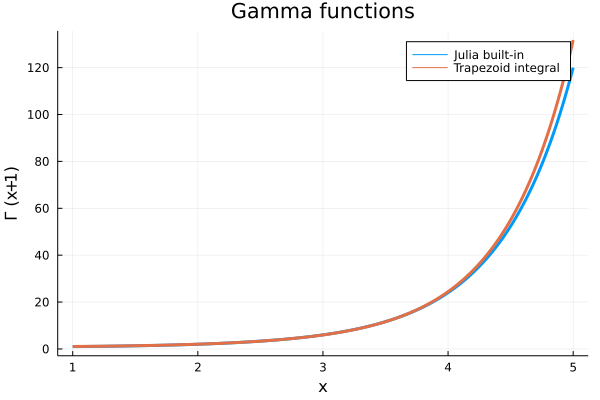

In [4]:
Plots.plot(
    x,
    y,
    title="Gamma functions",
    label="Julia built-in",
    lw=3,
    xlabel="x",
    ylabel="\\Gamma (x+1)"
)
Plots.plot!(x,z,lw=3,label="Trapezoid integral")

# KR3 and KR4: Benchmark comparison

To measure the time it takes for the machine to process an operation, we can use the `@time` macro. In addition to the processing time, this macro also shows the memory allocation of the process. Here we compare the runtimes of the built-in and custom Gamma functions and see that although both take up the same amount of memory for all its subprocesses, the built-in function takes a significantly shorter time to resolve.

We also note that we've already called the two functions earlier so the time measured is already compiled.

In [5]:
@time SpecialFunctions.gamma.(x .+ 1.0);
@time gamma_trap.(x.+1.0,10);

  0.000060 seconds (7 allocations: 8.188 KiB)
  0.000652 seconds (7 allocations: 8.188 KiB)


Alternatively, we can use the `@elapsed` macro to store the values as a float into a variable.

In [6]:
elapsed_built = @elapsed SpecialFunctions.gamma.(x .+ 1.0);
elapsed_custom = @elapsed gamma_trap.(x.+1.0,10);
println("Julia built-in: $elapsed_built \nCustom: $elapsed_custom")

Julia built-in: 5.28e-5 
Custom: 0.0006999


If we want to get more memory information, we can use the `@timev` macro

In [7]:
println("Julia Built-in:")
@timev SpecialFunctions.gamma.(x .+ 1.0);
println("Custom function:")
@timev gamma_trap.(x.+1.0,10);

Julia Built-in:
  0.000051 seconds (7 allocations: 8.188 KiB)
elapsed time (ns): 50500
bytes allocated:   8384
pool allocs:       6
non-pool GC allocs:1
Custom function:
  0.000655 seconds (7 allocations: 8.188 KiB)
elapsed time (ns): 654900
bytes allocated:   8384
pool allocs:       6
non-pool GC allocs:1


If we want a more statistically sound runtime measurement, we can use the `@benchmark` macro found in the `BenchmarkTools` module. It runs the function entered several times and returns a statistical results on the computed runtimes

In [ ]:
Pkg.add("BenchmarkTools");

In [9]:
using BenchmarkTools

In [10]:
@benchmark SpecialFunctions.gamma.(x .+ 1.0)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  26.600 μs … 164.300 μs  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     27.700 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   29.365 μs ±   7.662 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▆█▆▄▄▂▁▁                                                     ▂
  █████████▇▆▆▆▅▅▆▄▅▄▄▅▄▅▅▅▅▆██▆▇▇▅▆▅▄▅▄▃▄▃▃▁▃▄▅▆▇▇▇▇▆▆▇▇▆▅▅▅▅ █
  26.6 μs       Histogram: log(frequency) by time      64.9 μs <

 Memory estimate: 8.23 KiB, allocs estimate: 8.

In [11]:
@benchmark gamma_trap.(x.+1.0,10)

BenchmarkTools.Trial: 7894 samples with 1 evaluation.
 Range (min … max):  611.700 μs …  1.647 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     624.300 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   630.195 μs ± 35.710 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▁▄▅▇██▆▄▂▂▂▂▂▁      ▁                                        ▂
  ████████████████▇██████▇█▇▇▇▆▅▆▅▄▃▅▆▅▅▄▅▅▄▁▅▄▃▄▄▃▃▄▅▃▆▄▅▅▃▃▃ █
  612 μs        Histogram: log(frequency) by time       767 μs <

 Memory estimate: 8.19 KiB, allocs estimate: 7.

A more compact version can be found in the `@btime` module, so it can be stored in a variable.

In [12]:
println("Julia Built-in:")
@btime SpecialFunctions.gamma.(x .+ 1.0);
println("Custom function:")
@btime gamma_trap.(x.+1.0,10);

Julia Built-in:
  26.600 μs (8 allocations: 8.23 KiB)
Custom function:
  611.300 μs (7 allocations: 8.19 KiB)


# KR5: Profiling in Julia

Instead of measuring actual runtime, we can measure how many times each individual sub-operation is called in a function. This process, called profiling, is common practice in identifying the bottlenecks of numerical simulations. In Julia, we can use the `Profile` package to access the `@profile` macro. This creates a nested list of processes and subprocess along with the number of times it is called. This is under the assumption that the more times a process is called, the longer it takes for it to resolve.

In [46]:
using Profile
using ProfileView
using ProfileSVG

We place the function we are inspecting in a for-loop so it gets called several times for statistical significance

In [39]:
@profile for _ in 1:1_000 SpecialFunctions.gamma.(x .+ 1.0) end;

Profile data gets stored in a `Profile()` object. We can use the `.print()` method to return the computed profile. In the result below, with an overhead of 12 units, 8 units come from calling the actual gamma function. 

In [40]:
Profile.print()

Overhead ╎ [+additional indent] Count File:Line; Function
 ╎12 @Base\task.jl:411; (::IJulia.var"#15#18")()
 ╎ 12 @IJulia\src\eventloop.jl:8; eventloop(socket::ZMQ.Socket)
 ╎  12 @Base\essentials.jl:706; invokelatest
 ╎   12 @Base\essentials.jl:708; #invokelatest#2
 ╎    12 ...c\execute_request.jl:67; execute_request(socket::ZMQ.Sock...
 ╎     12 ...c\SoftGlobalScope.jl:65; softscope_include_string(m::Mod...
 ╎    ╎ 12 @Base\loading.jl:1116; include_string(mapexpr::typeof...
 ╎    ╎  12 @Base\boot.jl:360; eval
 ╎    ╎   12 ...file\src\Profile.jl:28; top-level scope
 ╎    ╎    12 In[39]:1; macro expansion
 ╎    ╎     12 @Base\broadcast.jl:883; materialize(bc::Base.Broadca...
 ╎    ╎    ╎ 12 @Base\broadcast.jl:908; copy
 ╎    ╎    ╎  11 @Base\broadcast.jl:936; copyto!
 ╎    ╎    ╎   11 @Base\broadcast.jl:983; copyto!
 ╎    ╎    ╎    11 @Base\simdloop.jl:77; macro expansion
 ╎    ╎    ╎     11 @Base\broadcast.jl:984; macro expansion
1╎    ╎    ╎    ╎ 1  @Base\array.jl:839; setindex!
 ╎    

A more visual representation can be achieved with the `.view()` method. We can also use the `@profview` macro from the `ProfileSVG` package

In [43]:
ProfileView.view()

Gtk.GtkWindowLeaf(name="", parent, width-request=-1, height-request=-1, visible=TRUE, sensitive=TRUE, app-paintable=FALSE, can-focus=FALSE, has-focus=FALSE, is-focus=FALSE, focus-on-click=TRUE, can-default=FALSE, has-default=FALSE, receives-default=FALSE, composite-child=FALSE, style, events=0, no-show-all=FALSE, has-tooltip=FALSE, tooltip-markup=NULL, tooltip-text=NULL, window, opacity=1.000000, double-buffered, halign=GTK_ALIGN_FILL, valign=GTK_ALIGN_FILL, margin-left, margin-right, margin-start=0, margin-end=0, margin-top=0, margin-bottom=0, margin=0, hexpand=FALSE, vexpand=FALSE, hexpand-set=FALSE, vexpand-set=FALSE, expand=FALSE, scale-factor=1, border-width=0, resize-mode, child, type=GTK_WINDOW_TOPLEVEL, title="Profile", role=NULL, resizable=TRUE, modal=FALSE, window-position=GTK_WIN_POS_NONE, default-width=800, default-height=600, destroy-with-parent=FALSE, hide-titlebar-when-maximized=FALSE, icon, icon-name=NULL, screen, type-hint=GDK_WINDOW_TYPE_HINT_NORMAL, skip-taskbar-hint

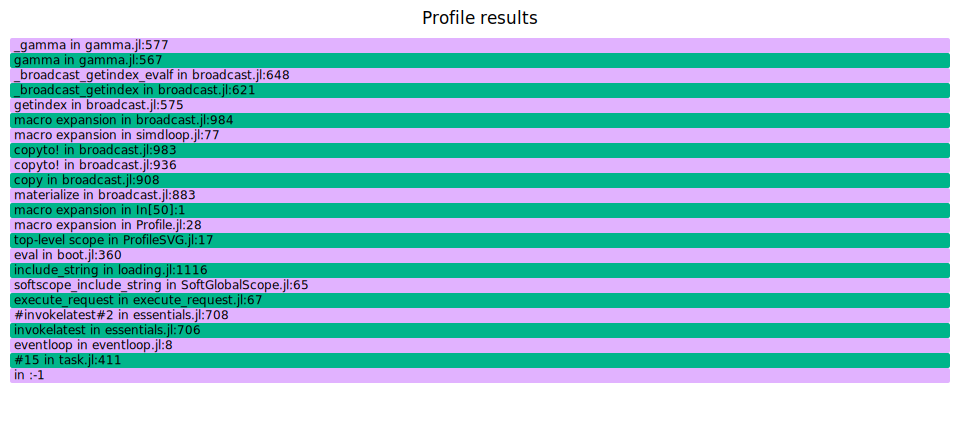

In [50]:
@ProfileSVG.profview for _ in 1:1_000 SpecialFunctions.gamma.(x .+ 1.0) end

If we want to profile another function, we must clear the `Profile()` object first

In [51]:
Profile.clear()

In [52]:
@profile for _ in 1:1_000 gamma_trap.(x.+1.0,10) end;
Profile.print()

Overhead ╎ [+additional indent] Count File:Line; Function
   ╎323 @Base\task.jl:411; (::IJulia.var"#15#18")()
   ╎ 323 @IJulia\src\eventloop.jl:8; eventloop(socket::ZMQ.Socket)
   ╎  323 @Base\essentials.jl:706; invokelatest
   ╎   323 @Base\essentials.jl:708; #invokelatest#2
   ╎    323 ...\execute_request.jl:67; execute_request(socket::ZMQ.So...
   ╎     323 ...\SoftGlobalScope.jl:65; softscope_include_string(m::Mo...
   ╎    ╎ 323 @Base\loading.jl:1116; include_string(mapexpr::type...
   ╎    ╎  323 @Base\boot.jl:360; eval
   ╎    ╎   323 ...le\src\Profile.jl:28; top-level scope
   ╎    ╎    323 In[52]:1; macro expansion
  1╎    ╎     1   @Base\broadcast.jl:1315; broadcasted(::Function, :...
   ╎    ╎     322 @Base\broadcast.jl:883; materialize(bc::Base.Broa...
   ╎    ╎    ╎ 322 @Base\broadcast.jl:908; copy
   ╎    ╎    ╎  322 @Base\broadcast.jl:936; copyto!
   ╎    ╎    ╎   322 @Base\broadcast.jl:983; copyto!
   ╎    ╎    ╎    322 @Base\simdloop.jl:77; macro expansion
   ╎    ╎   

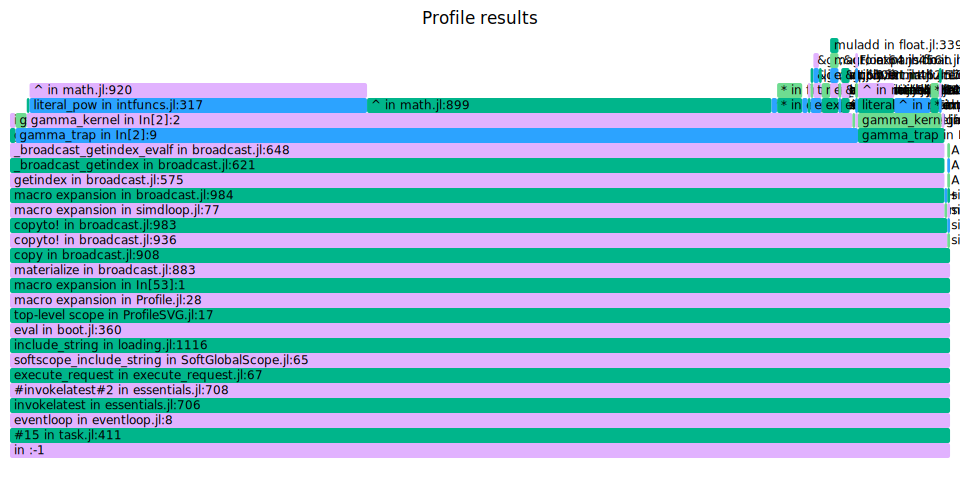

In [53]:
@ProfileSVG.profview for _ in 1:1_000 gamma_trap.(x.+1.0,10) end

Each block represents a line of code or a subprocess as part of the whole, with upper levels as the nested processes.

To get even more detailed information, we can use the `TimerOutputs` module. This is used to profile 

# KR6: Discussion on runtime comparison

From out tests above,it is evident that the built-in function is arguably faster than our custom function. From the `Profileview`, we can see that besides the computation of the integrand, bulk of the process in the custom function is from `math.jl`, or the iterated summation from the trapezoid rule. 